# jr-yr-stats: Exploratory Data Analysis (EDA)

In [2]:
# module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# import data
df = pd.read_csv('../data/NEW_enriched_matches.csv')

### Descriptive Statistics

In [13]:
# total matches played (2016, 2017, 2019)
print("Raw counts -", df.shape[0], "games\n", df['result'].value_counts())
print("\nNormalized -", df.shape[0], "games\n", round(df['result'].value_counts(normalize=True), 2))

Raw counts - 157 games
 result
W    93
L    63
T     1
Name: count, dtype: int64

Normalized - 157 games
 result
W    0.59
L    0.40
T    0.01
Name: proportion, dtype: float64


In [14]:
# average set difference & margin
print("Set difference:", round(df['set_diff'].mean(), 2))
print("Margin:", round(df['margin_pct'].mean(), 2), "%")

Set difference: 0.59
Margin: 0.22 %


Looking at the average difference in sets won vs sets lost per match. 
- Won 3–0, set difference = +3
- Lost 2–3, set difference = –1
- Won 2–1, set difference = +1
- Lost 0–2, set difference = –2

In [15]:
# describe DF
print(round(df.describe(), 2))

       career_match_index  season_match_number  week_of_season  \
count              151.00               157.00          157.00   
mean                76.00                20.34            5.22   
std                 43.73                11.75            2.51   
min                  1.00                 1.00            1.00   
25%                 38.50                10.00            3.00   
50%                 76.00                20.00            6.00   
75%                113.50                30.00            7.00   
max                151.00                46.00           11.00   

       days_since_last_match  match_density_3days  match_no  \
count                 157.00               157.00    157.00   
mean                    7.39                 3.27      1.69   
std                    40.18                 2.08      1.15   
min                     0.00                 1.00      1.00   
25%                     0.00                 1.00      1.00   
50%                     2.0

### Performance Over Time

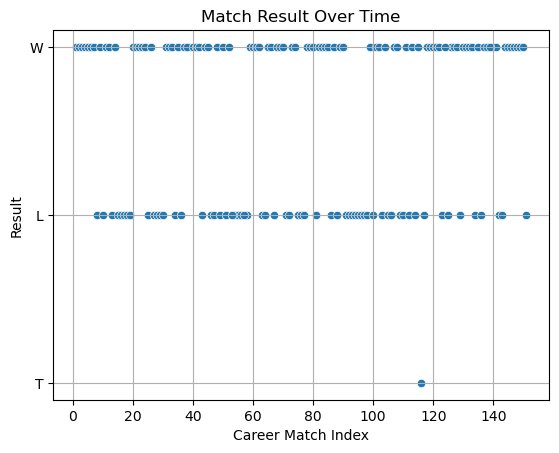

In [18]:
sns.scatterplot(data=df, x="career_match_index", y="result", marker="o")
plt.title("Match Result Over Time")
plt.ylabel("Result")
plt.xlabel("Career Match Index")
plt.grid(True)
plt.show()

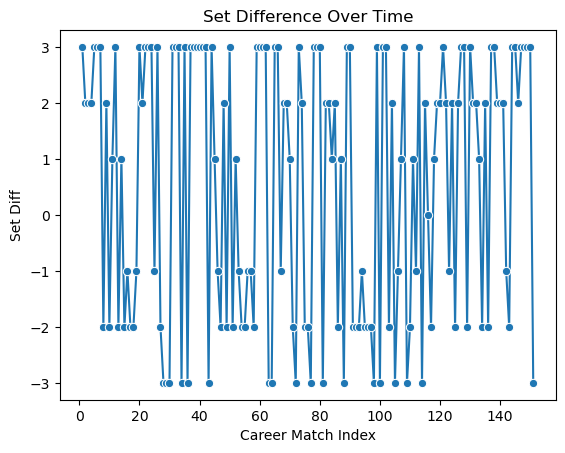

In [19]:
sns.lineplot(data=df, x="career_match_index", y="set_diff", marker="o")
plt.title("Set Difference Over Time")
plt.xlabel("Career Match Index")
plt.ylabel("Set Diff")
plt.show()

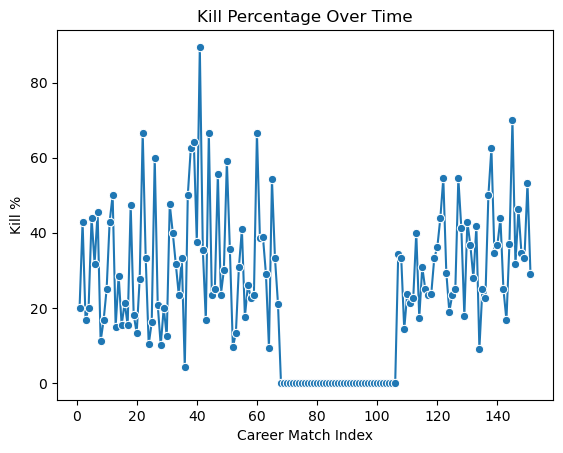

In [20]:
sns.lineplot(data=df, x="career_match_index", y="kill_pct", marker="o")
plt.title("Kill Percentage Over Time")
plt.ylabel("Kill %")
plt.xlabel("Career Match Index")
plt.show()

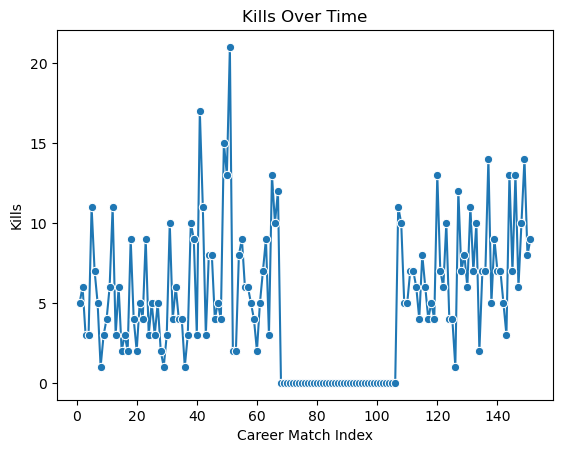

In [21]:
sns.lineplot(data=df, x="career_match_index", y="kills", marker="o")
plt.title("Kills Over Time")
plt.ylabel("Kills")
plt.xlabel("Career Match Index")
plt.show()

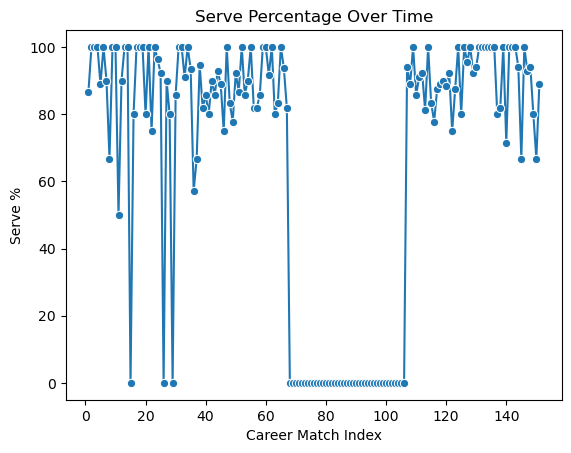

In [22]:
sns.lineplot(data=df, x="career_match_index", y="serve_pct", marker="o")
plt.title("Serve Percentage Over Time")
plt.ylabel("Serve %")
plt.xlabel("Career Match Index")
plt.show()

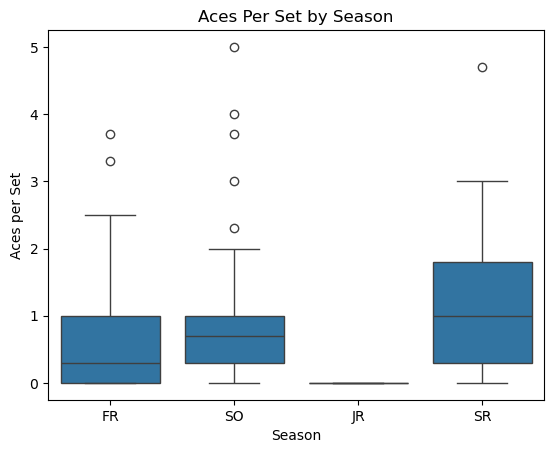

In [24]:
sns.boxplot(data=df, x="season", y="aces_per_set")
plt.title("Aces Per Set by Season")
plt.xlabel("Season")
plt.ylabel("Aces per Set")
plt.show()

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

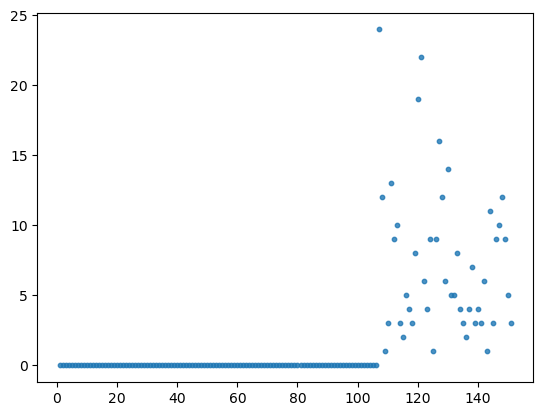

In [ ]:
# only really reliable for senior year as coaches did not start tracking points until then. 
sns.regplot(data=df, x="career_match_index", y="points", lowess=True, scatter_kws={"s": 10})
plt.title("Points Scored Over Time")
plt.xlabel("Career Match Index")
plt.ylabel("Points")
plt.show()

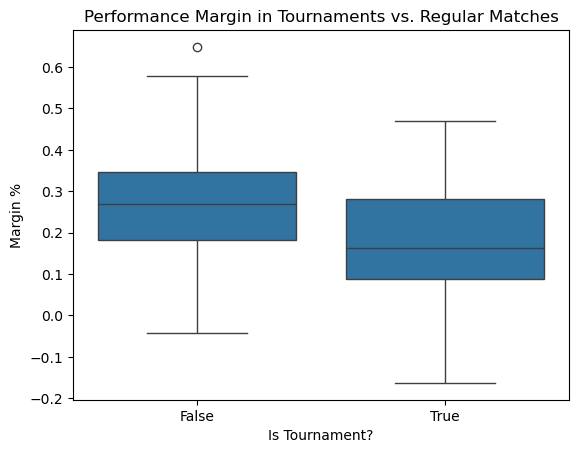

In [28]:
sns.boxplot(data=df, x="is_tournament", y="margin_pct")
plt.title("Performance Margin in Tournaments vs. Regular Matches")
plt.xlabel("Is Tournament?")
plt.ylabel("Margin %")
plt.show()

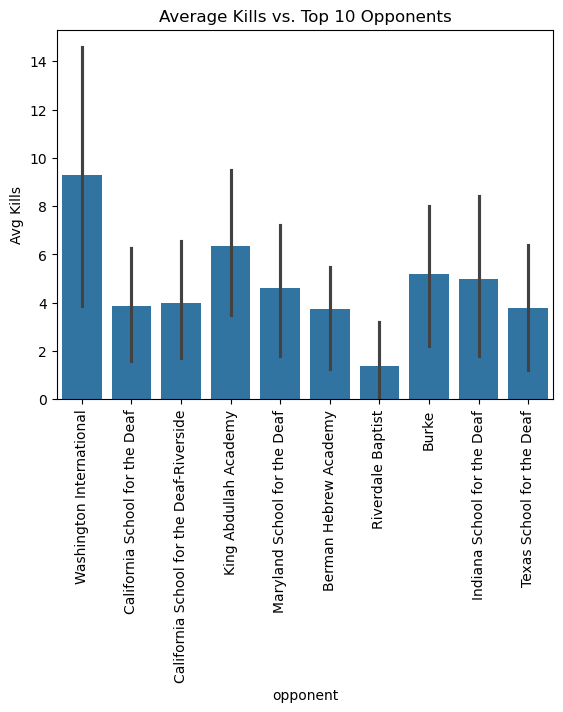

In [33]:
top_opponents = df['opponent'].value_counts().head(10).index
sns.barplot(data=df[df['opponent'].isin(top_opponents)],
            x="opponent", y="kills", estimator="mean", order=top_opponents)
plt.title("Average Kills vs. Top 10 Opponents")
plt.xticks(rotation=90)
plt.ylabel("Avg Kills")
plt.show()

### Opponents

In [47]:
df['opponent'] = df['opponent'].str.strip()

opponent_stats = df.groupby('opponent').agg(
    games_played=('result', 'count'),
    avg_set_diff=('set_diff', 'mean'),
    total_points_for=('total_points_for', 'mean'),
    total_points_against=('total_points_against', 'mean'),
    wins=('result', lambda x: (x == 'W').sum()),
    losses=('result', lambda x: (x == 'L').sum()),
    ties=('result', lambda x: (x == 'T').sum())
).reset_index()

opponent_stats['win_rate'] = opponent_stats['wins'] / opponent_stats['games_played']

In [48]:
# top 5 opponents dominated (by diff)
opponent_stats.sort_values('avg_set_diff', ascending=False).head(5)

,opponent,games_played,avg_set_diff,total_points_for,total_points_against,wins,losses,ties,win_rate
0,Alabama School for the Deaf,2,3.0,75.0,38.50,2,0,0,1.0
48,Smith Jewish Day School,4,3.0,75.0,43.25,4,0,0,1.0
1,Atlanta Area School for the Deaf,1,3.0,75.0,25.00,1,0,0,1.0
36,Oakcrest,3,3.0,75.0,49.00,3,0,0,1.0
24,Grace Christian Academy,1,3.0,75.0,47.00,1,0,0,1.0


In [49]:
# top 5 opponents crushed by (by diff)
opponent_stats.sort_values('avg_set_diff').head(5)

,opponent,games_played,avg_set_diff,total_points_for,total_points_against,wins,losses,ties,win_rate
6,Bishop O'Connell,2,-3.00,75.0,35.5,0,2,0,0.0
50,St. John's,2,-3.00,75.0,47.0,0,2,0,0.0
5,Bishop Ireton,4,-2.75,69.5,43.5,0,4,0,0.0
14,Covenant Life,4,-2.75,80.0,53.0,0,4,0,0.0
22,Georgetown Day,2,-2.50,84.0,68.0,0,2,0,0.0


In [50]:
# opponents sorted by total points
opponent_stats.sort_values('total_points_for', ascending=False).head(5)

,opponent,games_played,avg_set_diff,total_points_for,total_points_against,wins,losses,ties,win_rate
52,Stone Ridge School of the Sacred Heart,1,-2.000000,92.000000,78.000000,0,1,0,0.000000
57,Washington International,7,-0.571429,88.000000,68.857143,2,5,0,0.285714
30,Maret,3,0.333333,84.333333,75.333333,2,1,0,0.666667
22,Georgetown Day,2,-2.500000,84.000000,68.000000,0,2,0,0.000000
43,Sandy Spring Friends,4,2.750000,81.000000,38.750000,4,0,0,1.000000


In [51]:
# opponents sorted by total points against
opponent_stats.sort_values('total_points_against', ascending=False).head(5)

,opponent,games_played,avg_set_diff,total_points_for,total_points_against,wins,losses,ties,win_rate
52,Stone Ridge School of the Sacred Heart,1,-2.000000,92.000000,78.000000,0,1,0,0.000000
30,Maret,3,0.333333,84.333333,75.333333,2,1,0,0.666667
57,Washington International,7,-0.571429,88.000000,68.857143,2,5,0,0.285714
22,Georgetown Day,2,-2.500000,84.000000,68.000000,0,2,0,0.000000
25,Highland,1,1.000000,65.000000,58.000000,1,0,0,1.000000


In [52]:
# opponents sorted by win rate, but only if played 3+ times
opponent_stats[opponent_stats['games_played'] >= 3].sort_values('win_rate', ascending=False)

,opponent,games_played,avg_set_diff,total_points_for,total_points_against,wins,losses,ties,win_rate
3,Bell,3,2.666667,80.666667,54.333333,3,0,0,1.000000
36,Oakcrest,3,3.000000,75.000000,49.000000,3,0,0,1.000000
43,Sandy Spring Friends,4,2.750000,81.000000,38.750000,4,0,0,1.000000
9,Burke,5,2.800000,79.600000,45.200000,5,0,0,1.000000
56,Washington Christian Academy,4,2.750000,80.750000,45.500000,4,0,0,1.000000
12,Clinton Grace Christian,3,2.333333,50.333333,29.333333,3,0,0,1.000000
49,Spencerville Adventist Academy,4,2.750000,79.750000,47.750000,4,0,0,1.000000
18,Field,4,3.000000,75.000000,40.750000,4,0,0,1.000000
48,Smith Jewish Day School,4,3.000000,75.000000,43.250000,4,0,0,1.000000
4,Berman Hebrew Academy,5,3.000000,75.000000,29.000000,5,0,0,1.000000


### Situational Analysis

In [54]:
# tournaments
df.groupby('is_tournament').agg(
    games=('match_key', 'count'),
    avg_set_diff=('set_diff', 'mean'),
    avg_margin_pct=('margin_pct', 'mean'),
    avg_points=('points', 'mean'),
    win_rate=('result', lambda x: (x == 'W').sum() / len(x))
)

,games,avg_set_diff,avg_margin_pct,avg_points,win_rate
is_tournament,,,,,
False,74,1.189189,0.273706,2.549296,0.702703
True,83,0.048193,0.178203,1.887500,0.493976


In [55]:
# duplicate opps
duplicate_games = df[df['is_duplicate_opponent_on_date']]
duplicate_games = duplicate_games.sort_values(by=['date', 'opponent', 'match_number'])

comparison = (
    duplicate_games
    .groupby(['date', 'opponent'])
    .agg(
        games=('match_key', 'count'),
        avg_set_diff=('set_diff', 'mean'),
        total_points=('points', 'sum'),
        win_rate=('result', lambda x: (x == 'W').sum() / len(x))
    )
    .reset_index()
)

comparison = comparison[comparison['games'] > 1] 
print(comparison)


KeyError: 'is_duplicate_opponent_on_date'

### Best & Worst Games

In [59]:
best_games = df.sort_values(by='points', ascending=False).head(5)[
    ['date', 'season', 'opponent', 'points', 'kills', 'hit_pct', 'match_key']
]
print("Top 5 Games by Points:")
print(best_games)

Top 5 Games by Points:
           date season                      opponent  points  kills  hit_pct  \
111  2019-08-29     SR                         Maret    24.0   11.0    0.219   
125  2019-09-19     SR                         Burke    22.0    7.0    0.312   
124  2019-09-17     SR  Washington Christian Academy    19.0   13.0    0.222   
131  2019-09-24     SR                         Field    16.0   12.0    0.409   
134  2019-09-30     SR          Sandy Spring Friends    14.0    6.0    0.286   

            match_key  
111  SR_08-29_MARET_1  
125  SR_09-19_BURKE_1  
124    SR_09-17_WCA_1  
131  SR_09-24_FIELD_1  
134   SR_09-30_SSFS_1  


In [60]:
best_kills = df.sort_values(by='kills', ascending=False).head(5)[
    ['date', 'season', 'opponent', 'kills', 'points', 'hit_pct', 'match_key']
]
print("Top 5 Games by Kills:")
print(best_kills)


Top 5 Games by Kills:
           date season                  opponent  kills  points  hit_pct  \
53   2017-10-03     SO  Washington International   21.0     0.0    0.288   
42   2017-09-14     SO                    McLean   17.0     0.0    0.842   
51   2017-09-26     SO             Covenant Life   15.0     0.0    0.160   
154  2019-10-30     SR  Washington International   14.0     9.0    0.214   
141  2019-10-08     SR                  Oakcrest   14.0     4.0    0.464   

               match_key  
53        SO_10-03_WIS_1  
42     SO_09-14_MCLEAN_1  
51         SO_09-26_CL_1  
154       SR_10-30_WIS_1  
141  SR_10-08_OAKCREST_1  


In [72]:
best_hit_pct = df[df['kill_attempts'] > 10].sort_values(by='hit_pct', ascending=False).head(5)[
    ['date', 'season', 'opponent', 'hit_pct', 'kills', 'kill_attempts', 'match_key']
]
print("Top 5 Games by Hit % (min 10 attempts):")
print(best_hit_pct)

Top 5 Games by Hit % (min 10 attempts):
           date season                          opponent  hit_pct  kills  \
42   2017-09-14     SO                            McLean    0.842   17.0   
46   2017-09-21     SO           Grace Christian Academy    0.667    8.0   
39   2017-09-09     SO  Atlanta Area School for the Deaf    0.571    9.0   
40   2017-09-09     SO       Alabama School for the Deaf    0.562   10.0   
128  2019-09-21     SR             King Abdullah Academy    0.545    6.0   

     kill_attempts          match_key  
42            19.0  SO_09-14_MCLEAN_1  
46            12.0     SO_09-21_GCA_1  
39            14.0    SO_09-09_AASD_1  
40            16.0    SO_09-09_AIDB_2  
128           11.0     SR_09-21_KAA_3  


In [71]:
worst_serve_pct = df[df['serve_attempts'] > 0].sort_values(by='serve_pct').head(5)[
    ['date', 'season', 'opponent', 'serve_pct', 'serve_attempts', 'serve_errors', 'match_key']
]
print("Bottom 5 Games by Serve %:")
print(worst_serve_pct)

Bottom 5 Games by Serve %:
           date season                   opponent  serve_pct  serve_attempts  \
16   2016-10-07     FR  Texas School for the Deaf        0.0             2.0   
11   2016-09-24     FR            Sidwell Friends       50.0             4.0   
37   2017-09-05     SO                      Maret       57.1             7.0   
149  2019-10-17     SR                     Barrie       66.7             6.0   
8    2016-09-24     FR      Islamic Saudi Academy       66.7             3.0   

     serve_errors           match_key  
16            2.0      FR_10-07_TSD_3  
11            2.0  FR_09-24_SIDWELL_5  
37            3.0    SO_09-05_MARET_1  
149           2.0   SR_10-17_BARRIE_1  
8             1.0      FR_09-24_ISA_2  


In [70]:
most_serve_err = df.sort_values(by='serve_errors', ascending=False).head(5)[
    ['date', 'season', 'opponent', 'serve_errors', 'serve_attempts', 'serve_pct', 'match_key']
]
print("Worst 5 Games by Serve Errors:")
print(most_serve_err)

Worst 5 Games by Serve Errors:
           date season                        opponent  serve_errors  \
155  2019-11-05     SR                            Bell           3.0   
154  2019-10-30     SR        Washington International           3.0   
117  2019-09-10     SR  Spencerville Adventist Academy           3.0   
37   2017-09-05     SO                           Maret           3.0   
124  2019-09-17     SR    Washington Christian Academy           3.0   

     serve_attempts  serve_pct         match_key  
155             9.0       66.7   SR_11-05_BELL_1  
154            15.0       80.0    SR_10-30_WIS_1  
117            16.0       81.2    SR_09-10_SAA_1  
37              7.0       57.1  SO_09-05_MARET_1  
124            26.0       88.5    SR_09-17_WCA_1  


In [69]:
worst_hit_pct = df[df['kill_attempts'] > 10].sort_values(by='hit_pct').head(5)[
    ['date', 'season', 'opponent', 'hit_pct', 'kills', 'kill_errors', 'kill_attempts', 'match_key']
]
print("Bottom 5 Games by Hit % (min 10 attempts):")
print(worst_hit_pct)

Bottom 5 Games by Hit % (min 10 attempts):
           date season                                  opponent  hit_pct  \
144  2019-10-12     SR                             Princess Anne   -0.222   
56   2017-10-06     SO  California School for the Deaf-Riverside   -0.190   
137  2019-10-04     SR                 Texas School for the Deaf   -0.182   
45   2017-09-19     SO                          Bishop O'Connell   -0.167   
69   2017-10-30     SO                  Washington International   -0.158   

     kills  kill_errors  kill_attempts        match_key  
144    3.0          7.0           18.0    SR_10-12_PA_2  
56     2.0          6.0           21.0  SO_10-06_CSDR_3  
137    2.0          6.0           22.0   SR_10-04_TSD_3  
45     3.0          6.0           18.0  SO_09-19_BOHS_1  
69    12.0         21.0           57.0   SO_10-30_WIS_1  


### Visualizations

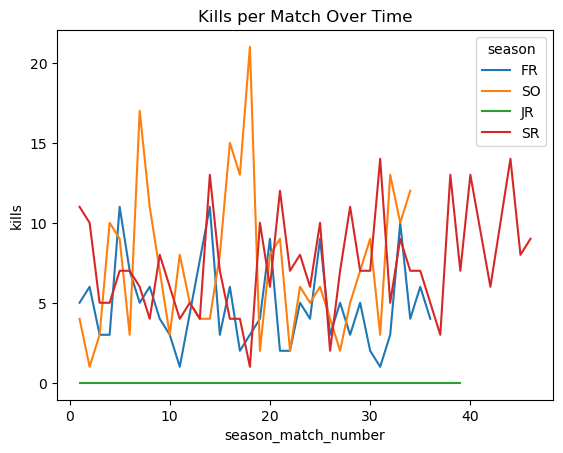

In [67]:
# K/M over time
sns.lineplot(data=df, x='season_match_number', y='kills', hue='season')
plt.title("Kills per Match Over Time")
plt.show()